In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import subprocess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

#  Load Winding Dataset

Dataset Original Length n:  2499
Dataset Sampled Length n:  2499


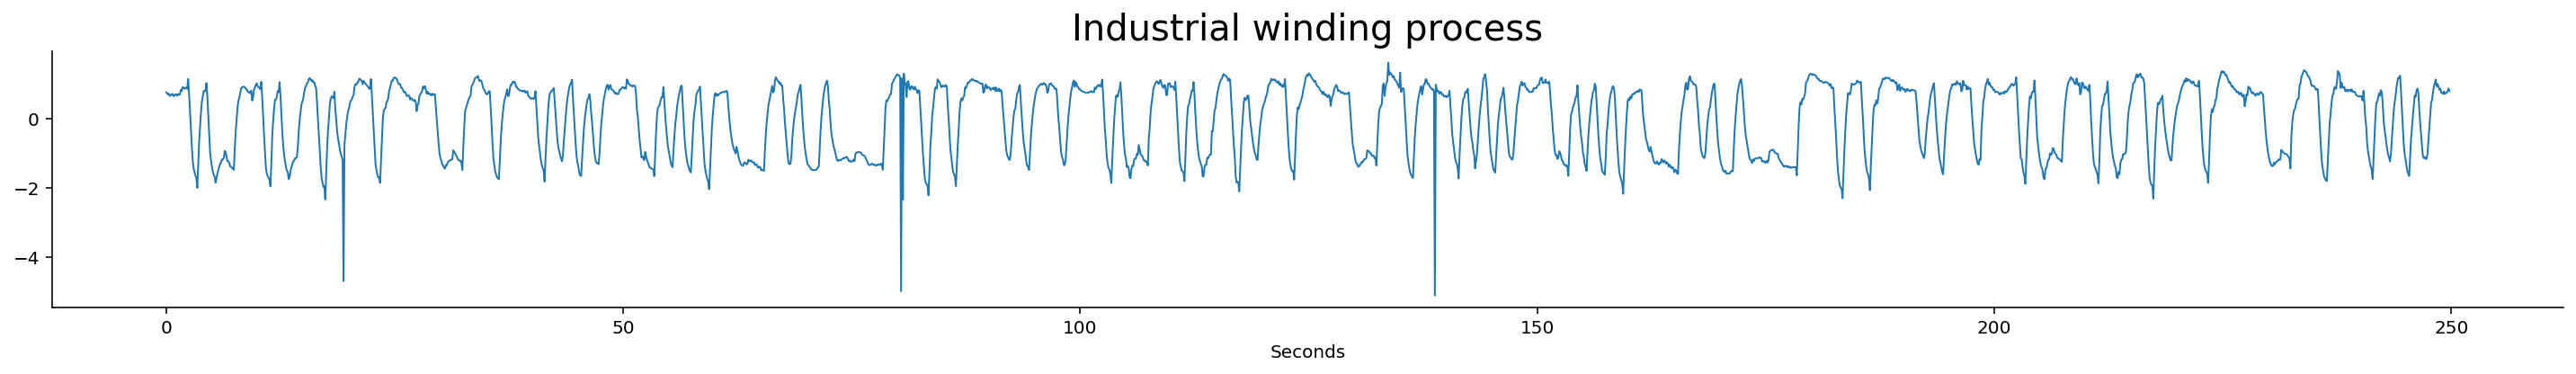

In [2]:
file = "winding_col.csv"
ds_name = "Industrial winding process"
series = ml.read_dataset_with_index(file) 
data = series.values
#series = ml.as_series(data, np.arange(0, len(data), 1) / 10, 'Seconds')
plot_dataset(file, series, ds_name=ds_name)

# Parameters

In [3]:
df = pd.DataFrame() # TOP-1
df2 = pd.DataFrame() # TOP-2
df_comp = pd.DataFrame(columns=["Method", "Motif", "Extent", "k"]) # Complete Info

rerun_all_jars = False
motif_length = 60
dataset = os.getcwd() + '/../datasets/original/' + file
print(dataset)

/Users/bzcschae/workspace/motiflets/notebooks/../datasets/winding_col.csv


# k-Motiflets

Compute ks: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.06it/s]


Chosen window-size: 60


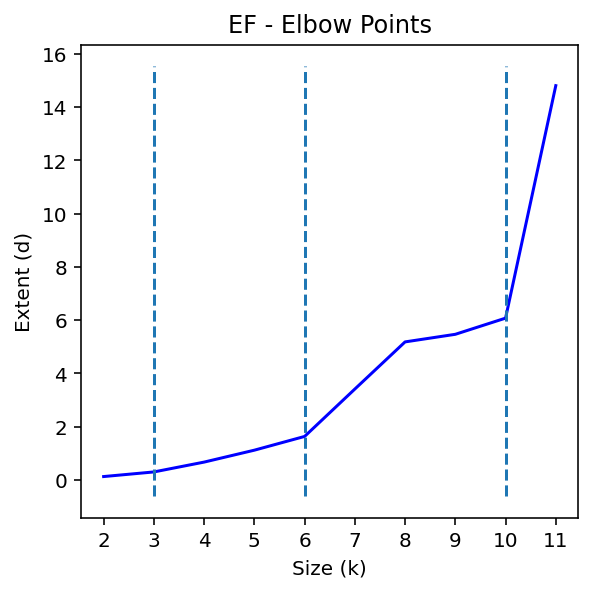

Identified Elbow Points [ 3  6 10]
Filtered Elbow Points [6, 10]


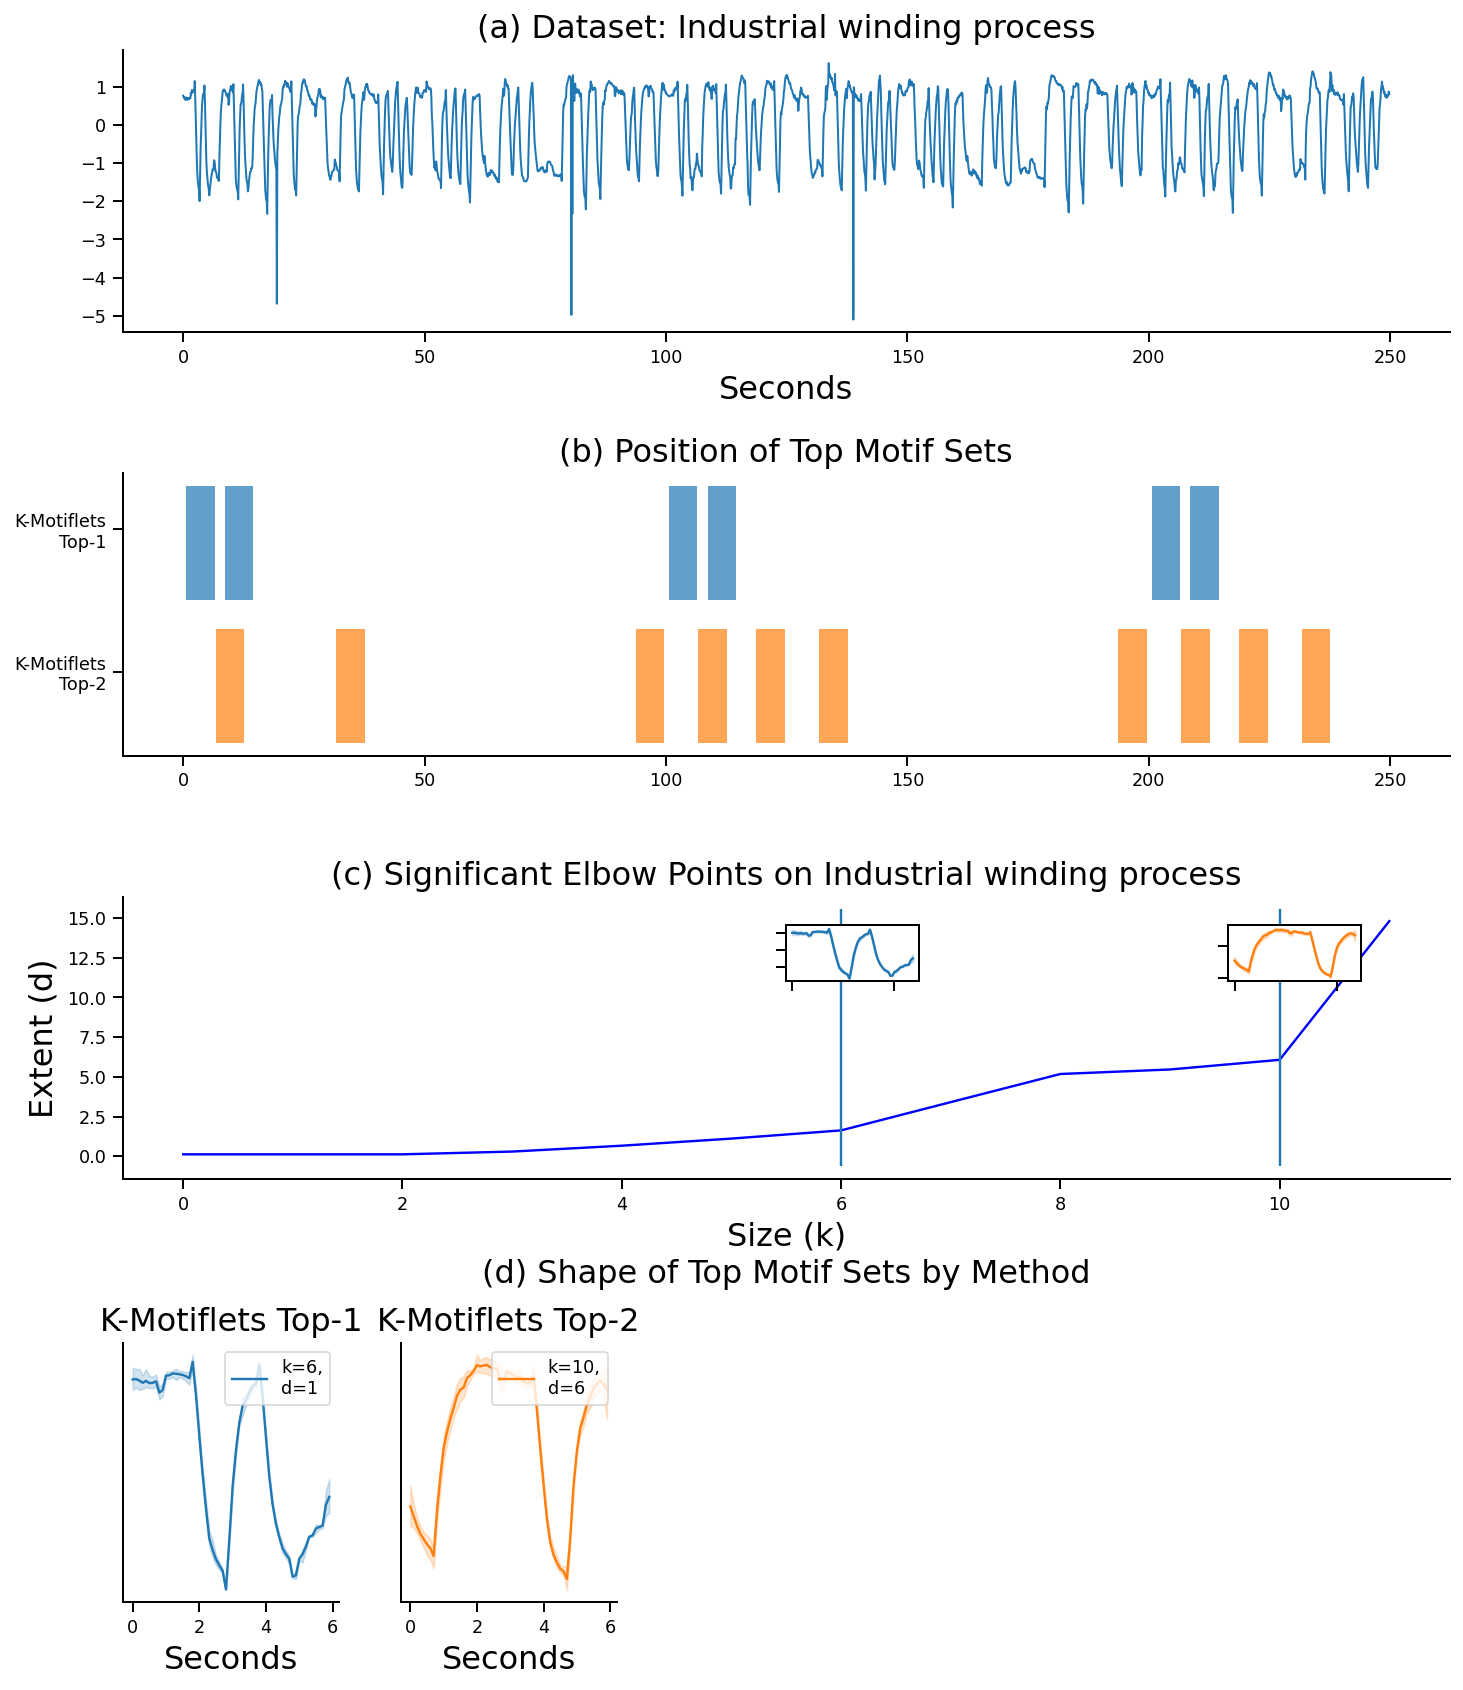

In [4]:
dists, motiflets, elbow_points = plot_elbow(
    12, series, file, ds_name=ds_name, plot_elbows=True, 
    motif_length=motif_length, method_name="K-Motiflets")

In [5]:
D_full = ml.compute_distances_full(data, motif_length)

df["Motiflets Top-1"] = [motiflets[elbow_points[-1]]]
df2["Motiflets Top-2"] = [motiflets[elbow_points[-2]]]
df_comp = append_all_motif_sets(df_comp, motiflets, "Motiflets", D_full)

# Set Finder
Runs java code:
- https://sites.google.com/site/timeseriesmotifsets/

In [6]:
max_r = 3
radii = np.arange(1, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/set_finder.jar',
       dataset,
       'SetFinder',
       str(list(radii)),
       str(motif_length)])

Radii [1 2 3]


r: 0.8065643 d: 1.4664794206619263
r: 0.8065643 d: 1.4664794206619263
r: 2.846363 d: 3.488884687423706
Filtered Elbow Points [0, 1]


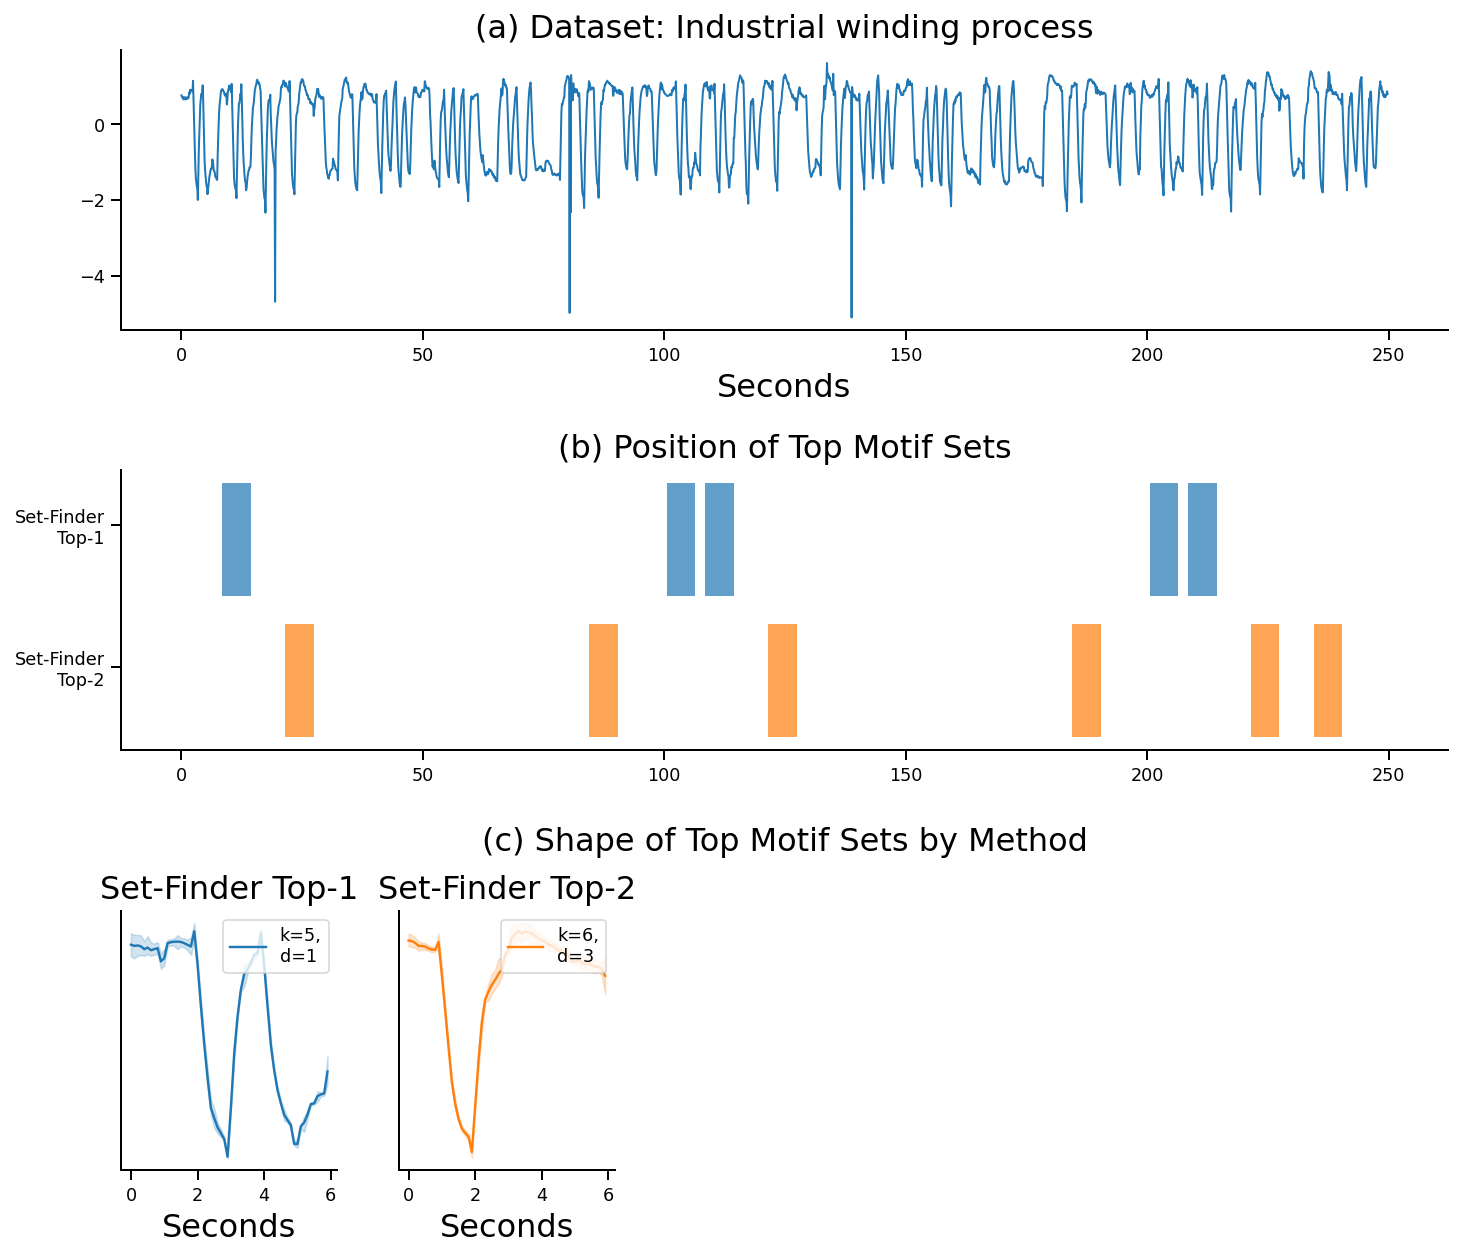

In [7]:
# run jave code first       
ms_set_finder = [
	[85, 1005, 1085, 2005, 2085],
	[85, 1005, 1085, 2005, 2085],
	[215, 845, 1215, 1845, 2215, 2345],    
]

motifset = plot_competitors(series, ds_name, ms_set_finder, motif_length, prefix="Set-Finder")

df["Set Finder Top-1"] = [motifset[-1]]
df2["Set Finder Top-2"] = [motifset[-2]]
df_comp = append_all_motif_sets(df_comp, ms_set_finder, "Set Finder", D_full)

# EMMA

Runs Java Code
- https://github.com/jMotif/SAX

In [8]:
max_r = 3
radii = np.arange(1, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/emma.jar',
       dataset,
       str(list(radii)),
       str(motif_length)])

Radii [1 2 3]


r: 1.6273574 d: 1.6273573637008667
r: 0.24768014 d: 0.24768014252185822
r: 5.2397275 d: 5.23972749710083
Filtered Elbow Points [0, 1]


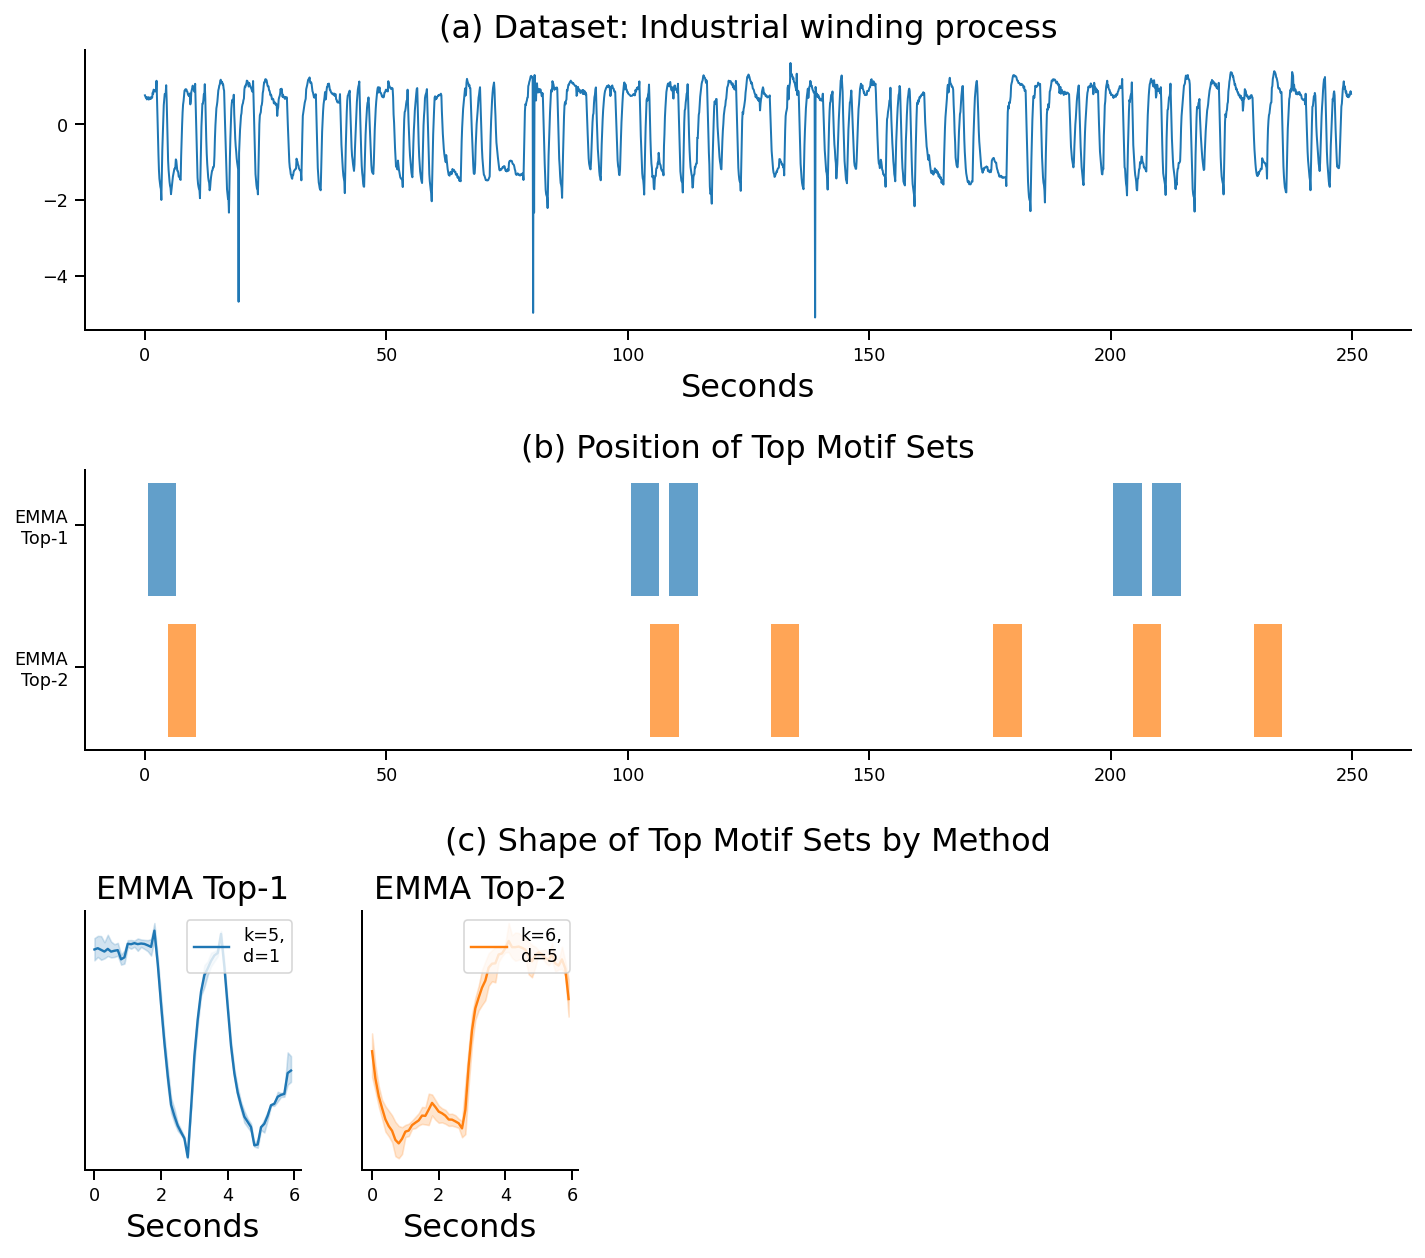

In [9]:
# run jave code first       
ms_emma = [
	[6, 1006, 1086, 2006, 2086],
	[1250, 2250],
	[47, 1047, 1296, 1757, 2046, 2296], 
]

motifset = plot_competitors(series, ds_name, ms_emma, motif_length, prefix="EMMA")

df["EMMA Top-1"] = [motifset[-1]]
df2["EMMA Top-2"] = [ms_emma[-3]]
df_comp = append_all_motif_sets(df_comp, ms_emma, "EMMA", D_full)

# Valmod Motif Sets
based on own (fixed-length) implementation

r: 0.12011867 d: 0.12011867016553879
r: 1.7772757 d: 1.7991280555725098
r: 3.9843953 d: 4.193019866943359
Filtered Elbow Points [2]


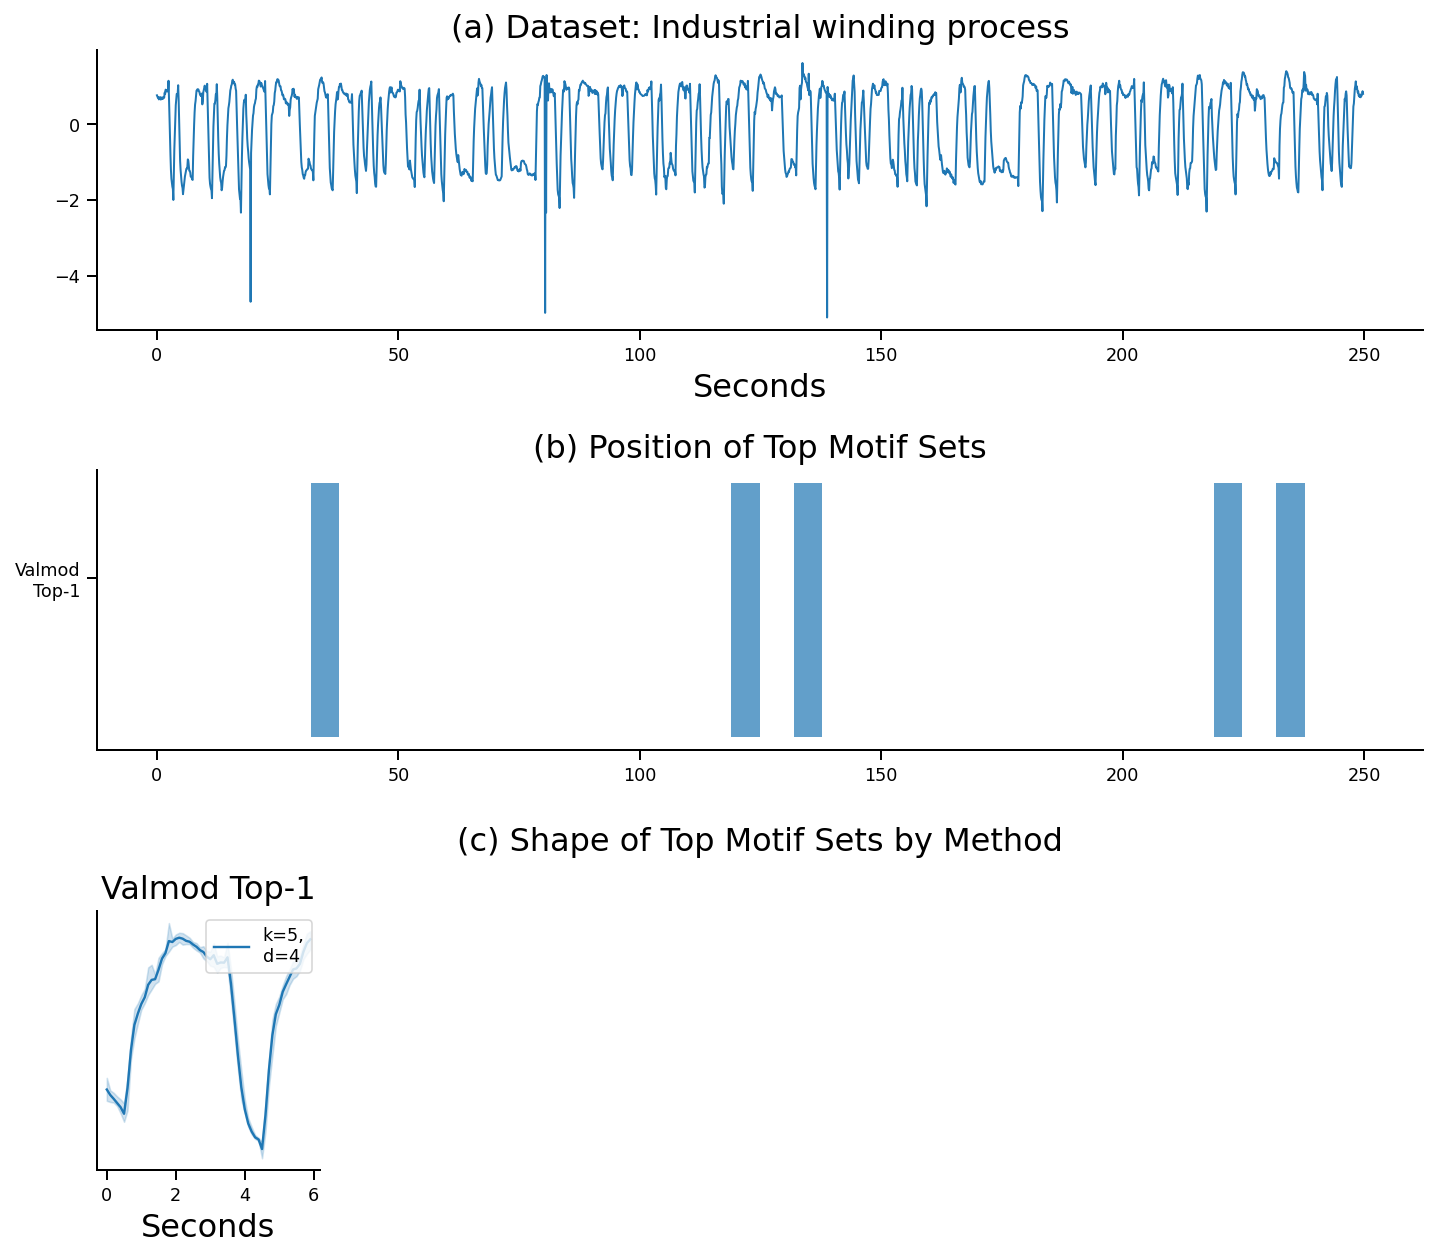

In [10]:
max_d = 3

data_raw = data.to_numpy() if isinstance(data, pd.Series) else data    
ms_valmod = [motifset for (motifset, _) in get_valmod_motif_set_ranged(data_raw, file, motif_length, max_d)]                                            
motifset = plot_competitors(series, ds_name, ms_valmod, motif_length, prefix="Valmod")

df["VALMOD Top-1"] = [motifset[-1]]
df2["VALMOD Top-2"] = [ms_valmod[-3]]
df_comp = append_all_motif_sets(df_comp, ms_valmod, "VALMOD", D_full)

# Learning Motifs
See Java Code

In [11]:
max_r = 3
radii = np.arange(1, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/latent_motifs.jar',
       dataset,
       str(list(radii)),
       str(motif_length)])

Radii [1 2 3]


r: 0.46272618 d: 0.5290006995201111
r: 3.5642612 d: 4.094539165496826
Filtered Elbow Points [0, 1]


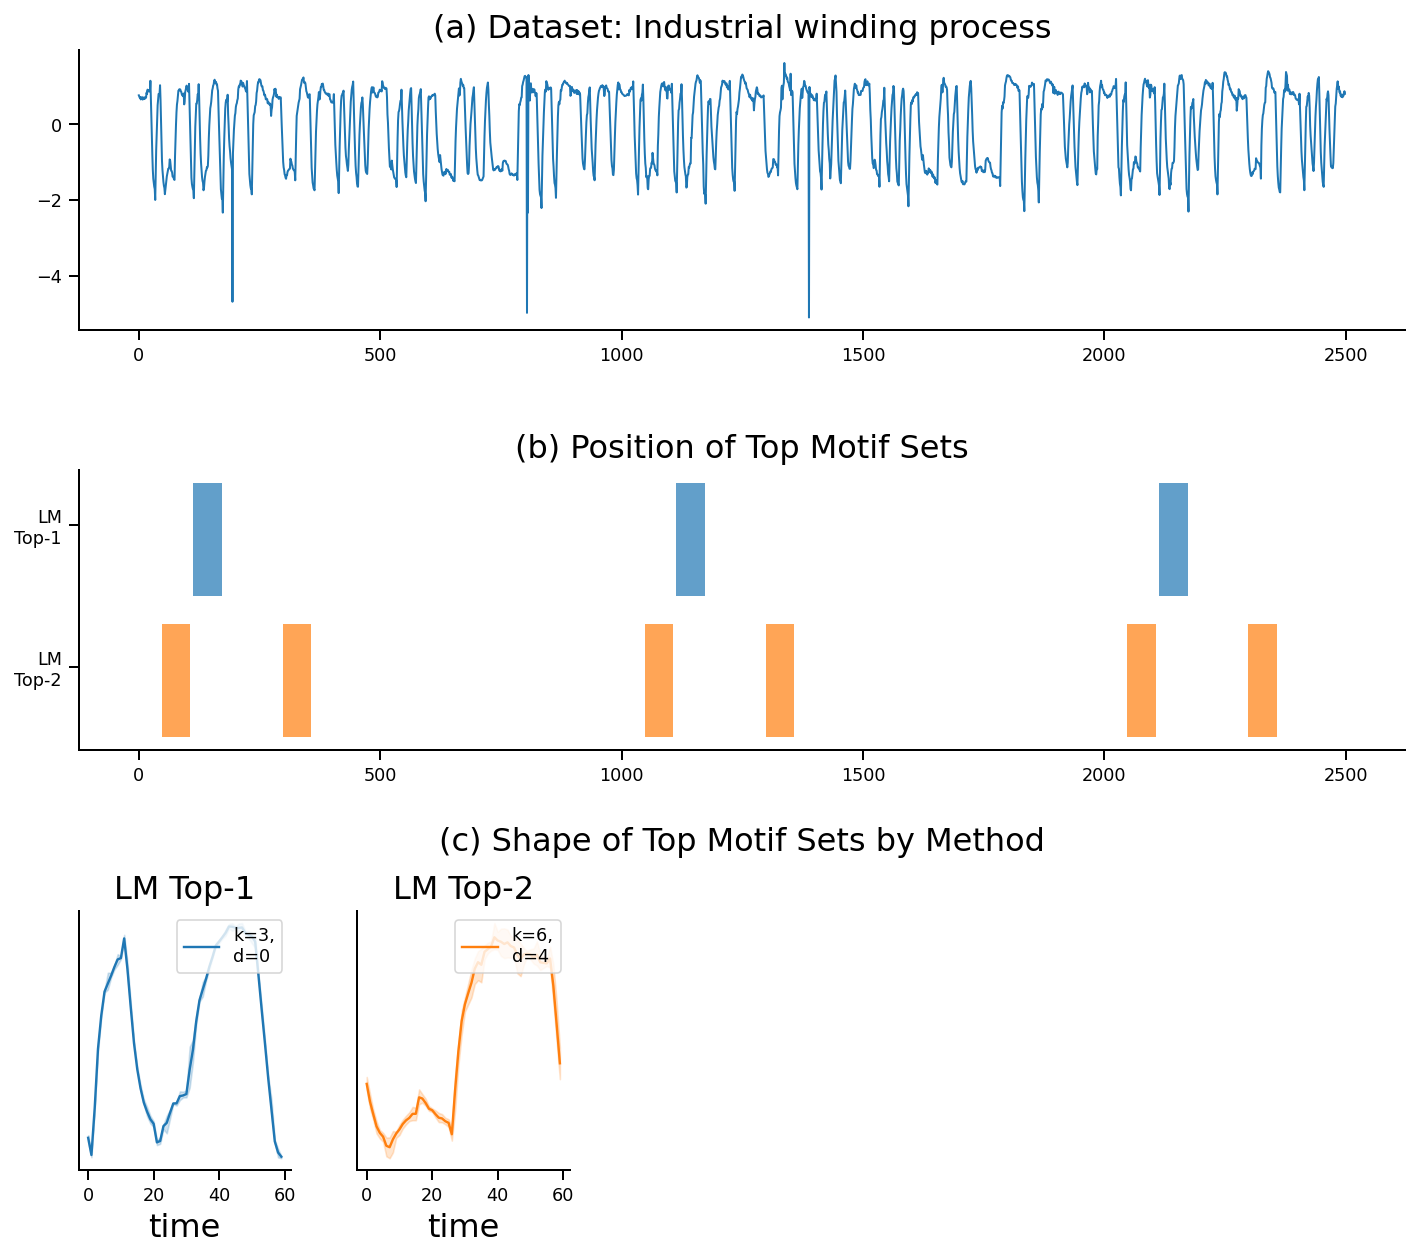

In [12]:
ms_learning_motifs = np.array([
    [113,1113,2113,],
    [48,298,1048,1298,2047,2298,],
    #[68,317,938,1068,1188,1317,1938,2068,2188,2317]
])

    
motifset = plot_competitors(data, ds_name, ms_learning_motifs, motif_length, prefix="LM")

df["LM Top-1"] = [motifset[-1]]
df2["LM Top-2"] = [motifset[-2]]
df_comp = append_all_motif_sets(df_comp, ms_learning_motifs, "LM", D_full)

# Comparison

In [13]:
df_all = (pd.concat([df, df2], axis=1)).T
df_all.rename(columns={0:"offsets"}, inplace=True)
df_all

,offsets
Motiflets Top-1,"[317, 2317, 1317, 2067, 2187, 1067, 1187, 67, ..."
Set Finder Top-1,"[215, 845, 1215, 1845, 2215, 2345]"
EMMA Top-1,"[47, 1047, 1296, 1757, 2046, 2296]"
VALMOD Top-1,"[319, 1189, 1319, 2189, 2318]"
LM Top-1,"[48, 298, 1048, 1298, 2047, 2298]"
Motiflets Top-2,"[6, 1006, 2006, 86, 1086, 2086]"
Set Finder Top-2,"[85, 1005, 1085, 2005, 2085]"
EMMA Top-2,"[6, 1006, 1086, 2006, 2086]"
VALMOD Top-2,"[1189, 2189]"
LM Top-2,"[113, 1113, 2113]"


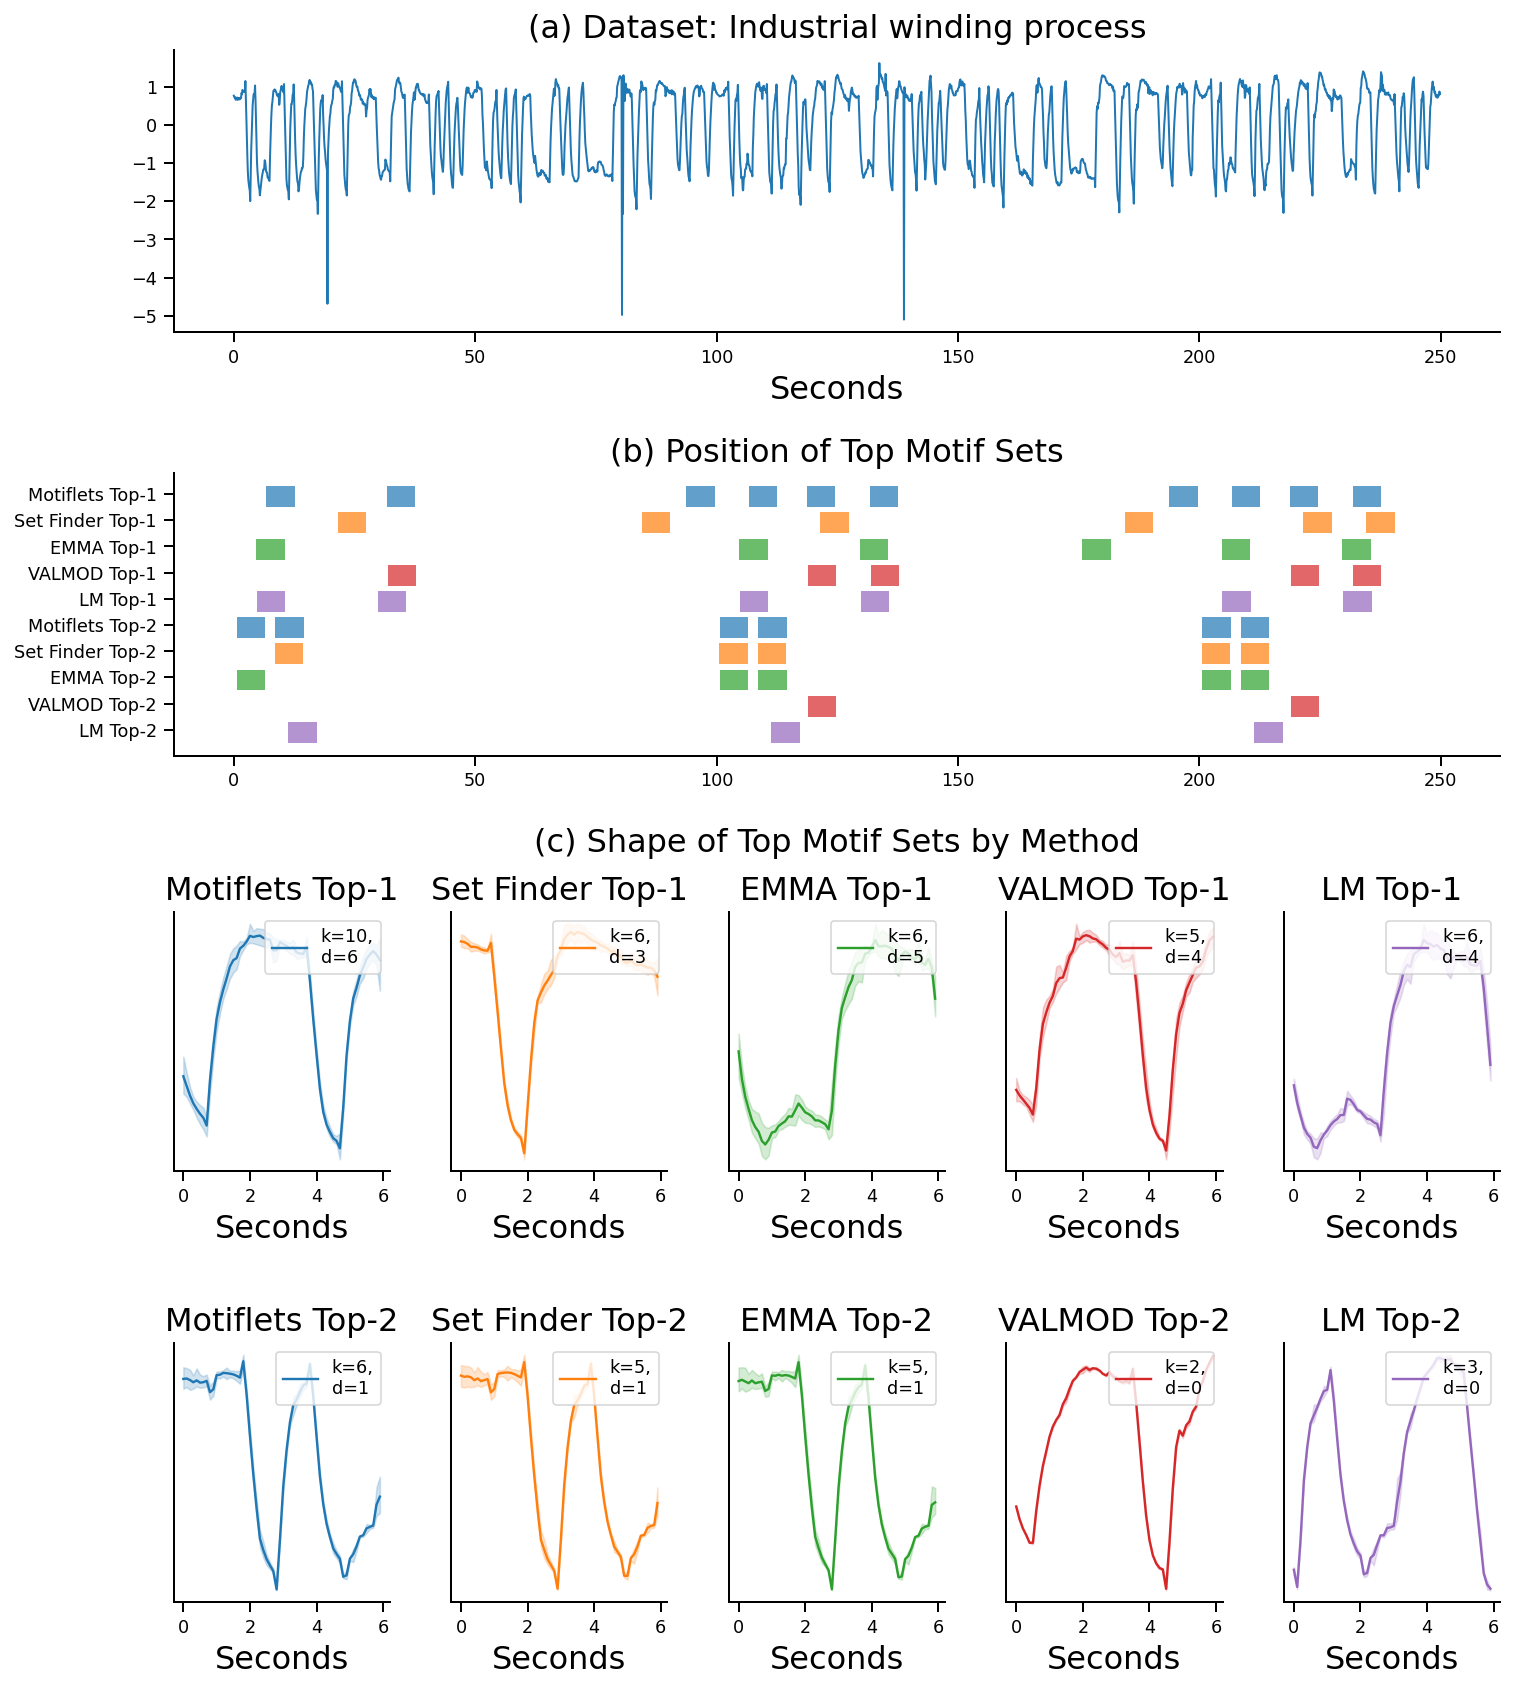

In [14]:
motifsets = np.array(df_all["offsets"].values)
plot_all_competitors(series, ds_name, motifsets, motif_length, 
                     method_names=df_all.index.values)

# Summary

In [15]:
df_2 = df.T
df_2.rename(columns={0:"offsets"}, inplace=True)
df_2

,offsets
Motiflets Top-1,"[317, 2317, 1317, 2067, 2187, 1067, 1187, 67, ..."
Set Finder Top-1,"[215, 845, 1215, 1845, 2215, 2345]"
EMMA Top-1,"[47, 1047, 1296, 1757, 2046, 2296]"
VALMOD Top-1,"[319, 1189, 1319, 2189, 2318]"
LM Top-1,"[48, 298, 1048, 1298, 2047, 2298]"


In [16]:
extent = [ml.get_pairwise_extent(D_full, df_2.offsets[ind]) for ind in df_2.index]
count = [len(df_2.offsets[ind]) for ind in df_2.index]

df_statistics = pd.DataFrame(
    data=zip(df_2.index, extent, count), 
    columns=["Method", "Extent (d)", "Size (k)"])
df_statistics["Dataset"] = ds_name
display(df_statistics)

,Method,Extent (d),Cardinality (#),Dataset
0,Motiflets Top-1,6.073066,10,Industrial winding process
1,Set Finder Top-1,3.488885,6,Industrial winding process
2,EMMA Top-1,5.239727,6,Industrial winding process
3,VALMOD Top-1,4.193020,5,Industrial winding process
4,LM Top-1,4.094539,6,Industrial winding process


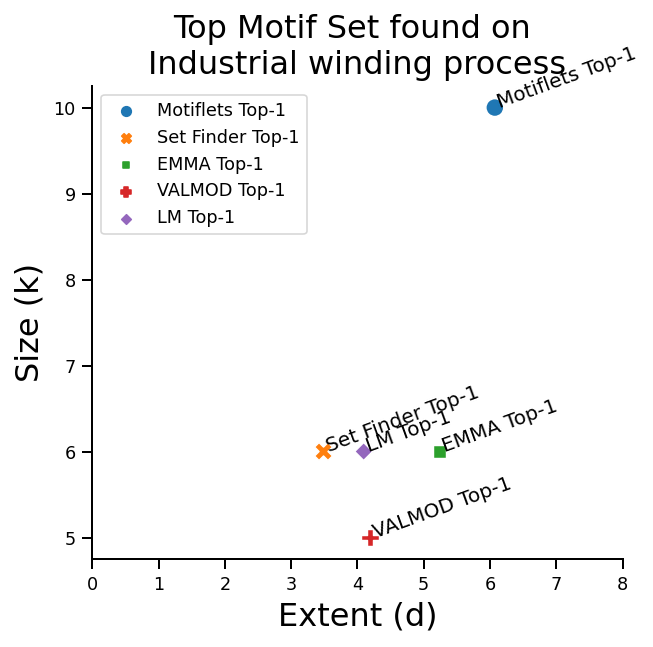

In [17]:
def annotate(ax, df):
    for ix, method, extent, cardinality, _ in df.itertuples():
        ax.annotate(
            method,
            (extent, cardinality),
            size = 10,
            rotation=+20
        )

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df_statistics, 
                x="Extent (d)", y="Size (k)", hue="Method", 
                style="Method", s=80, ax=ax)
annotate(ax, df_statistics)
ax.set_xlim([0, 8])
ax.set_title("Top Motif Set found on \n"+ ds_name)
ax.legend(loc="upper left")
ax.set_ylabel("Size (k)")
ax.set_xlabel("Extent (d)")
sns.despine()
plt.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)
#plt.savefig("../images/" + ds_name.replace(" ", "-") + "_compare.pdf", bbox_inches='tight')

# Compare Relationship between size and extent

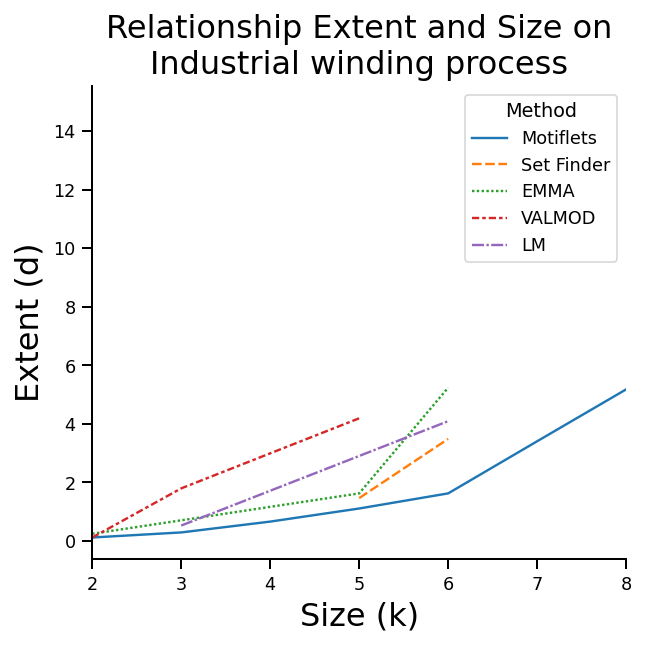

In [18]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Relationship Extent and Size on\n" + ds_name)
sns.lineplot(x="k", y="Extent", data=df_comp, hue="Method", style="Method")
sns.despine()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim([2,8])
ax.set_xlabel("Size (k)")
ax.set_ylabel("Extent (d)")
plt.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)
#plt.savefig("../images/" + ds_name.replace(" ", "-")  + "_compare2.pdf", bbox_inches='tight')